<a href="https://colab.research.google.com/github/ItzKalpesh/Diabetes-git-repository/blob/main/Diabetes_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# @title Default title text
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kalpeshcodes","key":"3229888e87a3212e0a2da264446caeb9"}'}

In [73]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [74]:
!ls ~/.kaggle


kaggle.json


In [75]:
!pip install kaggle

In [76]:
!kaggle datasets download uciml/pima-indians-diabetes-database -p /content/diabetes --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.23MB/s]


In [77]:
import pandas as pd
df = pd.read_csv('/content/diabetes/diabetes.csv')

In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [80]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [81]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

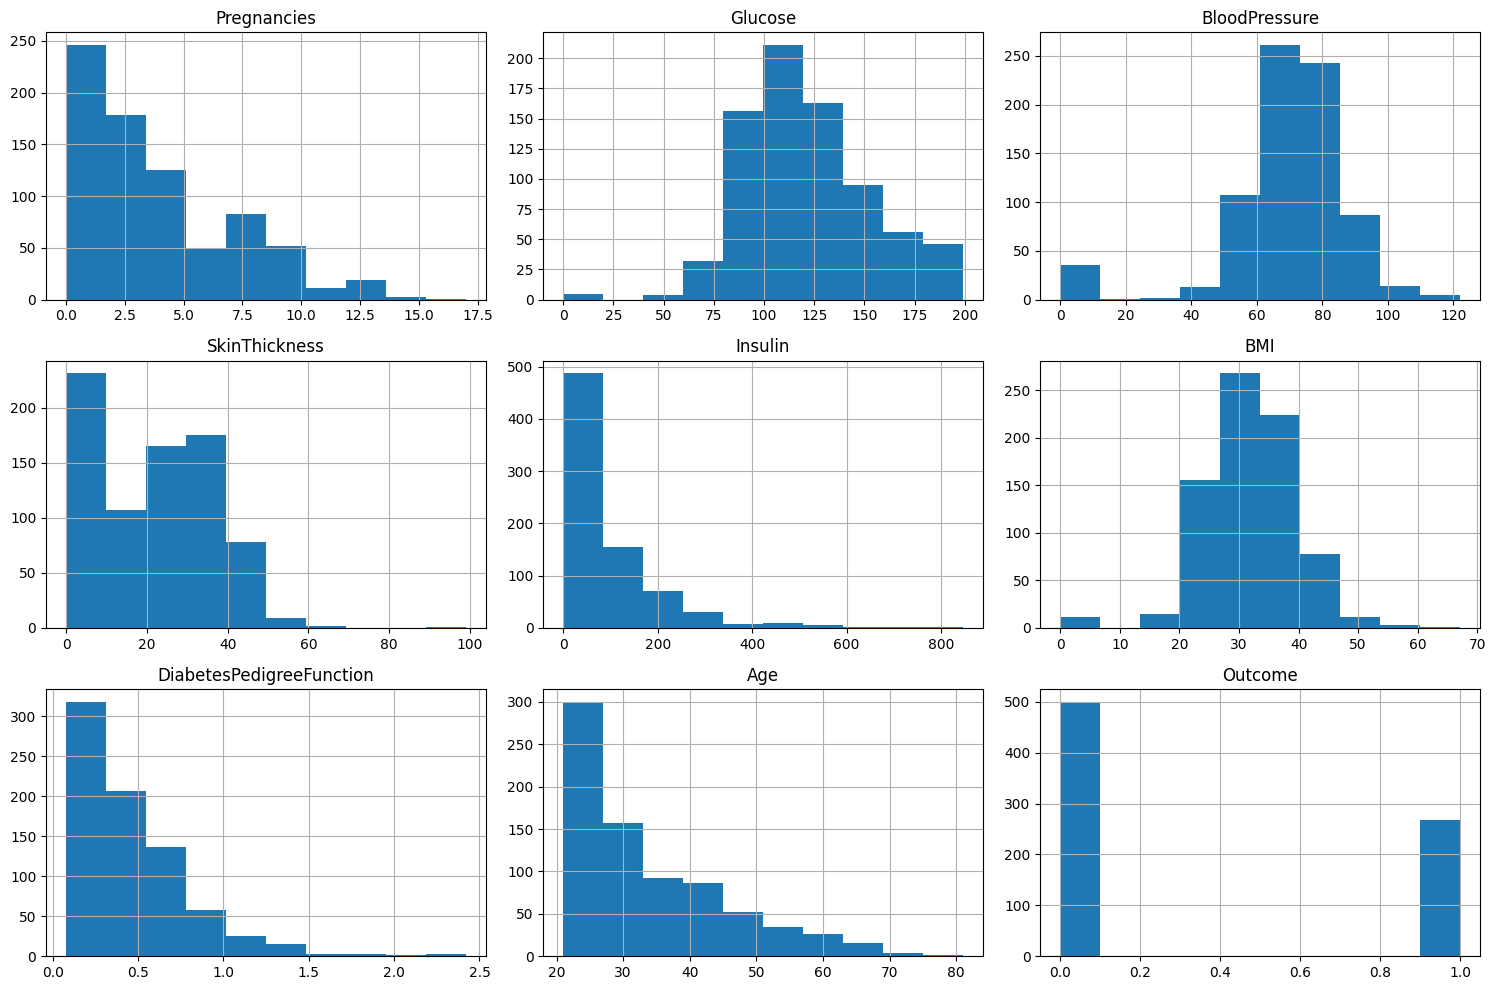

In [83]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

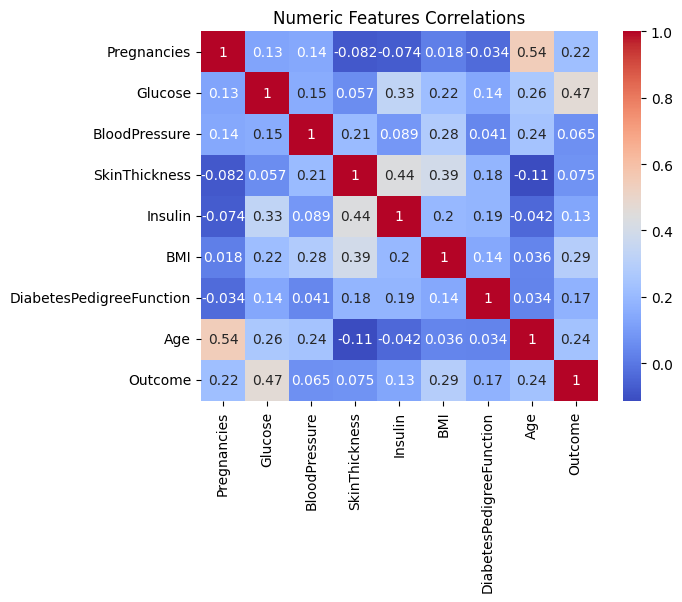

In [84]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Features Correlations')
plt.show()

In [85]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'Outcome' in cat_cols:
  cat_cols. remove('Outcome')

In [86]:
X = df.drop('Outcome', axis=1)
y=(df['Outcome'] >0).astype(int)
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [87]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [90]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [95]:
from sklearn.metrics import confusion_matrix

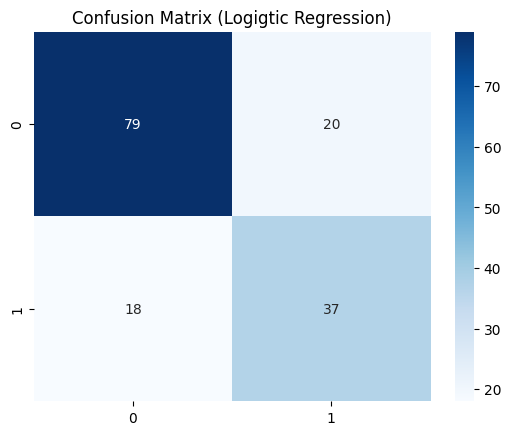

In [96]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logigtic Regression)')
plt.show()

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [99]:
print("Random Forest Classifier: ",accuracy_score(y_test,y_pred_lr))

Random Forest Classifier:  0.7532467532467533


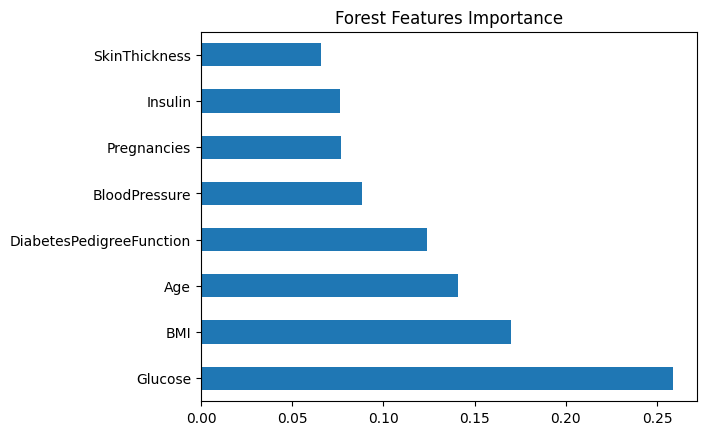

In [100]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Forest Features Importance")
plt.show()

In [101]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [102]:
joblib.dump(scaler,'diabetes_scaler.pkl')

['diabetes_scaler.pkl']

In [107]:
sample_data = df.sample(n=5, random_state=45)  # random_state ensures reproducibility
sample_data.to_csv('/content/diabetes_dataset.csv', index=False)

In [108]:
print(sample_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
195            5      158             84             41      210  39.4   
51             1      101             50             15       36  24.2   
66             0      109             88             30        0  32.5   
437            5      147             75              0        0  29.9   
665            1      112             80             45      132  34.8   

     DiabetesPedigreeFunction  Age  Outcome  
195                     0.395   29        1  
51                      0.526   26        0  
66                      0.855   38        1  
437                     0.434   28        0  
665                     0.217   24        0  


In [109]:
from google.colab import files
files.upload()

Saving diabetes_dataset.csv to diabetes_dataset (2).csv


{'diabetes_dataset (2).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n5,158,84,41,210,39.4,0.395,29,1\n1,101,50,15,36,24.2,0.526,26,0\n0,109,88,30,0,32.5,0.855,38,1\n5,147,75,0,0,29.9,0.434,28,0\n1,112,80,45,132,34.8,0.217,24,0\n'}

In [110]:
import joblib
import pandas as pd

user_df = pd.read_csv('diabetes_dataset.csv') # Changed to diabetes.csv
user_df = user_df.drop('Outcome', axis=1) # Drop the target variable

numeric_cols=df.select_dtypes(include='number').columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()
bools_cols = df.select_dtypes(include='bool').columns.tolist()

numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bools_cols if col in user_df.columns]

user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df [col]=user_df[col].fillna('Unknown')

for col in bool_cols:
  user_df [col]=user_df[col].astype(int)

#One-hot encoding cat columns
user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)
#Allign columns
user_df_encoded = user_df_encoded. reindex(columns=X.columns, fill_value=0)
#Scale data
scaler = joblib. load('diabetes_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#prediction
model=joblib.load('random_forest_model.pkl')
preds=model.predict(user_df_scaled)
user_df['Diabetes_Disease_Prediction']=preds

#show result
print(user_df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            5      158             84             41      210  39.4   
1            1      101             50             15       36  24.2   
2            0      109             88             30        0  32.5   
3            5      147             75              0        0  29.9   
4            1      112             80             45      132  34.8   

   DiabetesPedigreeFunction  Age  Diabetes_Disease_Prediction  
0                     0.395   29                            1  
1                     0.526   26                            0  
2                     0.855   38                            0  
3                     0.434   28                            0  
4                     0.217   24                            0  
